### Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_seq_items', None)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
np.set_printoptions(threshold=np.nan)

import warnings
import traceback

warnings.filterwarnings('ignore')
import argparse
import re
import sys, os

sys.path.append(os.getcwd())

import os
import requests
from requests.exceptions import ConnectionError

import bs4
from bs4 import BeautifulSoup
from fastnumbers import isfloat
from fastnumbers import fast_float
from multiprocessing.dummy import Pool as ThreadPool 
import more_itertools
from random import shuffle

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline
import json

import seaborn as sns
sns.set_style('whitegrid')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import math
import gc
import ipaddress
from urllib.parse import urlparse
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from data_science_utils import dataframe as df_utils
from data_science_utils import models as model_utils
from data_science_utils.dataframe import column as column_utils
from data_science_utils.models.IdentityScaler import IdentityScaler as IdentityScaler


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

import lightgbm as lgb

np.set_printoptions(threshold=np.nan)
import pickle



plt.rcParams["figure.figsize"] = (24,4)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import datetime
from scipy import signal
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn import linear_model
from sklearn.metrics import roc_auc_score



InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_seq_items', None)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

from data_science_utils.financial import *





In [ ]:
https://www.nseindia.com/products/dynaContent/common/productsSymbolMapping.jsp?symbol=HEROMOTOCO&segmentLink=3&symbolCount=1&series=EQ&dateRange=24month&fromDate=&toDate=&dataType=DELIVERABLE

In [343]:
from io import StringIO
import httplib2
def get_nse_deliverable(nse_name):
    url = "https://www.nseindia.com/products/dynaContent/common/productsSymbolMapping.jsp?symbol=%s&segmentLink=3&symbolCount=1&series=EQ&dateRange=24month&fromDate=&toDate=&dataType=DELIVERABLE"%nse_name
    page_response = requests.get(url,headers=headers, timeout=240)
    if page_response.status_code > 299:
        print("Failed to fetch: %s" % url)
        page_response = requests.get(url, timeout=240)
    page_content = BeautifulSoup(page_response.content, "html.parser")
    elem = page_content.find("div",attrs={"id":"csvContentDiv"})
    csvText = elem.text
    io = StringIO(csvText)
    return pd.read_csv(io, sep=",")
    

In [ ]:
get_nse_deliverable("HEROMOTOCO")

### Read from File and Filter

In [3]:
import dill
with open('stock_results.pkl', 'rb') as f:
    accumulator = dill.load(f)
    failures = dill.load(f)

### Preparing Data

In [4]:
nifty = pd.read_csv("ind_nifty50list.csv")
nifty_symbols = list(nifty['Symbol'].values)

In [5]:
accumulator=get_all_company_from_mf("MSB1174",threadpool_size=32)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

Scrips which failed to fetch = 0
[]


In [16]:
all_prices_df = {acc:accumulator[acc]['past_prices']['all_past_prices'][["open","close","low","high","volume"]] for acc in nifty_symbols}
for key in all_prices_df.keys():
    df = all_prices_df[key]
    stock_detail = accumulator[key]
    date = pd.to_datetime(prev_weekday(date.today()))
    row = pd.Series({"low":stock_detail['low'],"high":stock_detail['high'],"open":stock_detail['open'],'close':stock_detail['price'],'volume':stock_detail['volume']},name=date)
    df = df.append(row)


### Trees

In [105]:

for df in all_prices_df.values():
    df[["pct_change_close","pct_change_volume"]] = df[['close','volume']].pct_change()
    df['previous_pct_change_close'] = df['pct_change_close'].shift(1)
    df['previous_pct_change_volume'] = df['pct_change_volume'].shift(1)
    df['target'] = df['pct_change_close']>0.01
    df['previous_target'] = df['target'].shift(1)
    
    
    df['prev_close'] = df['close'].shift(1).fillna(0)
    df['prev_volume'] = df['volume'].shift(1).fillna(0)
    
    df["ewm_7_close"] = df['prev_close'].ewm(span=7).mean()
    df["ewm_30_close"] = df['prev_close'].ewm(span=30).mean()
    df["ewm_120_close"] = df['prev_close'].ewm(span=120).mean()
    
    df["ewm_7_close_diff"] = (df['prev_close']-df["ewm_7_close"])/df["ewm_7_close"]
    df["ewm_30_close_diff"] = (df['prev_close']-df["ewm_30_close"])/df["ewm_30_close"]
    df["ewm_120_close_diff"] = (df['prev_close']-df["ewm_120_close"])/df["ewm_120_close"]
    
    df["std_7_close"] = df['prev_close'].ewm(span=7).std()
    df["std_30_close"] = df['prev_close'].ewm(span=30).std()
    df["std_120_close"] = df['prev_close'].ewm(span=120).std()
    
    df["ewm_7_volume"] = df['prev_volume'].ewm(span=7).mean()
    df["ewm_30_volume"] = df['prev_volume'].ewm(span=30).mean()
    df["ewm_120_volume"] = df['prev_volume'].ewm(span=120).mean()
    
    df["ewm_7_volume_diff"] = (df['prev_volume'] - df["ewm_7_volume"])/df["ewm_7_volume"]
    df["ewm_30_volume_diff"] = (df['prev_volume'] - df["ewm_30_volume"])/df["ewm_30_volume"]
    df["ewm_120_volume_diff"] = (df['prev_volume'] - df["ewm_120_volume"])/df["ewm_120_volume"]
    
    df["std_7_volume"] = df['prev_volume'].ewm(span=7).std()
    df["std_30_volume"] = df['prev_volume'].ewm(span=30).std()
    df["std_120_volume"] = df['prev_volume'].ewm(span=120).std()
    

In [106]:
nifty_five_years = None
date_five_years = pd.to_datetime(datetime.date(2013, 1, 1))
for symbol in nifty_symbols:
    df = all_prices_df[symbol]
    df = df[df.index>date_five_years]
    df['name'] = symbol
    if nifty_five_years is None:
        nifty_five_years = df
    else:
        nifty_five_years = pd.concat((df,nifty_five_years))
    
    

In [107]:
nifty_five_years[['previous_target','target']].fillna(False,inplace=True)
nifty_five_years[['previous_target','target']] = nifty_five_years[['previous_target','target']].astype(bool)

In [108]:
nifty_five_years.sort_index(ascending=False,inplace=True)
nifty_five_years.head()

,close,volume,pct_change_close,pct_change_volume,previous_pct_change_close,previous_pct_change_volume,target,previous_target,prev_close,prev_volume,ewm_7_close,ewm_30_close,ewm_120_close,ewm_7_close_diff,ewm_30_close_diff,ewm_120_close_diff,std_7_close,std_30_close,std_120_close,ewm_7_volume,ewm_30_volume,ewm_120_volume,ewm_7_volume_diff,ewm_30_volume_diff,ewm_120_volume_diff,std_7_volume,std_30_volume,std_120_volume,name
2018-07-26,400.00,1233950,0.006289,3.726981,0.015326,0.031313,False,True,397.50,261044.0,381.874173,373.669694,382.621428,0.040919,0.063774,0.038886,14.066537,12.157924,19.903829,259802.053010,1.517511e+06,1.283731e+06,0.004780,-0.827979,-0.796652,1.493671e+06,7.493561e+06,6.623426e+06,ADANIPORTS
2018-07-26,370.25,81240,0.018289,0.317078,-0.006964,-0.490850,True,False,363.60,61682.0,360.714406,350.728684,341.074211,0.008000,0.036699,0.066044,4.941087,11.931024,17.257679,139323.322917,2.215140e+05,2.803874e+05,-0.557274,-0.721544,-0.780011,1.283065e+05,2.595765e+05,3.387210e+05,GAIL
2018-07-26,1110.35,154028,-0.003321,-0.418784,0.003152,-0.132227,False,False,1114.05,265010.0,1104.026787,1041.639793,969.568109,0.009079,0.069516,0.149017,30.734445,66.991898,78.860956,381244.251022,5.563024e+05,6.899628e+05,-0.304881,-0.523622,-0.615907,2.754536e+05,8.195358e+05,1.035827e+07,RELIANCE
2018-07-26,1957.00,20174,-0.004299,-0.617743,0.009528,0.969768,False,False,1965.45,52776.0,1934.228803,1931.806152,1855.517547,0.016141,0.017416,0.059246,29.014255,32.836467,119.350535,40047.329757,3.988241e+04,4.493129e+04,0.317841,0.323290,0.174593,2.073911e+04,3.375579e+04,7.241608e+04,INDUSINDBK
2018-07-26,7028.00,15712,0.010344,-0.406422,0.019030,0.322640,True,True,6956.05,26470.0,6683.209656,6256.850752,5713.272103,0.040825,0.111749,0.217525,320.322194,402.134400,563.922600,30436.036481,1.983925e+04,1.874472e+04,-0.130307,0.334224,0.412131,2.293386e+04,2.225764e+04,4.965549e+04,BAJAJFINSV


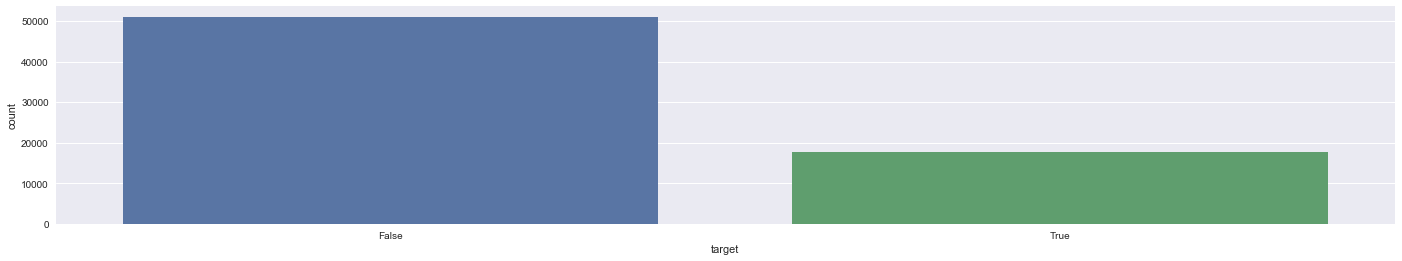

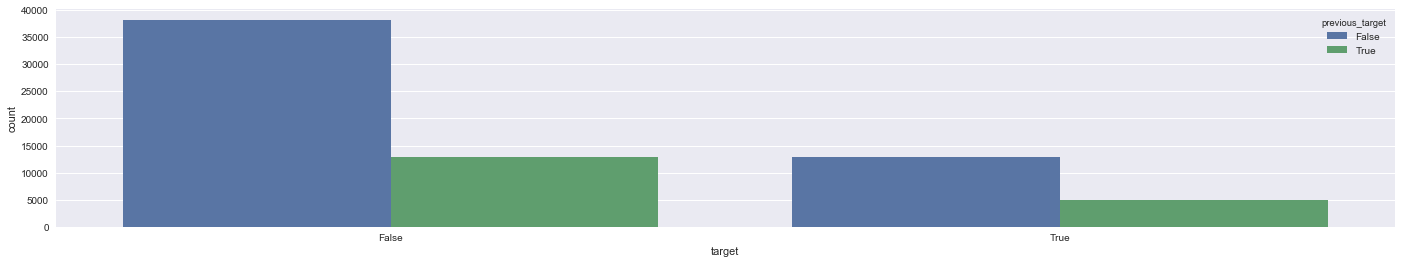

target
previous_target target        
False           False    38233
                True     12811
True            False    12821
                True      4912

,target
previous_target,
False,0.250980
True,0.276998


In [109]:
sns.set(style="darkgrid")
sns.countplot(x='target',data=nifty_five_years)
plt.show()
sns.countplot(x='target',hue='previous_target',data=nifty_five_years)
plt.show()

nifty_five_years.groupby(['previous_target','target'])[['target']].count()
nifty_five_years.groupby(['previous_target'])[['target']].mean()

In [110]:
cr = classification_report(nifty_five_years['target'],nifty_five_years['previous_target'])
print(cr)

             precision    recall  f1-score   support

      False       0.75      0.75      0.75     51054
       True       0.28      0.28      0.28     17723

avg / total       0.63      0.63      0.63     68777



##### Testing and CV
- 2018 as my test data
- random 20% test data
- one month lookahead as test data while previous dates as training

In [134]:
df_test = nifty_five_years[nifty_five_years.index>pd.to_datetime("06-01-2018")]
df_train = nifty_five_years[nifty_five_years.index<=pd.to_datetime("06-01-2018")]

df_train.shape
df_test.shape



(66862, 29)

(1915, 29)

##### Random Predictions

In [135]:
cr = classification_report(df_test['target'],df_test['previous_target'])
print(cr)

             precision    recall  f1-score   support

      False       0.76      0.76      0.76      1460
       True       0.24      0.24      0.24       455

avg / total       0.64      0.64      0.64      1915



In [133]:
one_prob = np.sum(df_test['target'])/df_test.shape[0]
y_pred_random = np.random.choice([False, True], size=(df_test.shape[0],), p=[1-one_prob, one_prob])

cr = classification_report(df_test['target'],y_pred_random)
print(cr)

             precision    recall  f1-score   support

      False       0.77      0.76      0.77      1460
       True       0.26      0.26      0.26       455

avg / total       0.65      0.64      0.65      1915



#### XGB

In [128]:
features = ['ewm_7_close', 'ewm_30_close', 'ewm_120_close', 'ewm_7_close_diff', 'ewm_30_close_diff', 'ewm_120_close_diff', 'std_7_close', 'std_30_close', 'std_120_close', 'ewm_7_volume', 'ewm_30_volume', 'ewm_120_volume', 'ewm_7_volume_diff', 'ewm_30_volume_diff', 'ewm_120_volume_diff', 'std_7_volume', 'std_30_volume', 'std_120_volume', 'previous_pct_change_volume', 'previous_target', 'previous_pct_change_close']
X_train = df_train[features]
y_train = df_train["target"]

X_test = df_test[features]
y_test = df_test["target"]


In [129]:

xgc = XGBClassifier(max_depth=8, learning_rate=0.6,n_estimators=100,n_jobs=4,missing=np.nan,gamma=1,eval_metric="auc")

In [130]:
xgc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=1, learning_rate=0.6,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=4, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [131]:
y_pred = xgc.predict(X_test)

cr = classification_report(df_test['target'],y_pred)
print(cr)

             precision    recall  f1-score   support

      False       0.77      0.91      0.83      1460
       True       0.29      0.11      0.16       455

avg / total       0.65      0.72      0.67      1915



In [132]:
y_scores = xgc.predict_proba(X_test)[:,1]

y_pred = y_scores>0.7
cr = classification_report(df_test['target'],y_pred)
print(cr)

             precision    recall  f1-score   support

      False       0.76      0.98      0.86      1460
       True       0.28      0.03      0.05       455

avg / total       0.65      0.75      0.67      1915



#### XGR %change 

In [112]:
dff = pd.DataFrame({"a":np.arange(10)})
rl = dff.rolling(2)
rl.agg({"a":lambda x:x[-1]-x[0]})

,a
0,NaN
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [41]:
from stockstats import StockDataFrame
date_six_years = pd.to_datetime("01-01-2012")

all_prices_df = {acc:accumulator[acc]['past_prices']['all_past_prices'][["open","close","low","high","volume"]] for acc in nifty_symbols}
for key in all_prices_df.keys():
    df = all_prices_df[key]
    stock_detail = accumulator[key]
    date = pd.to_datetime(prev_weekday(date.today()))
    row = pd.Series({"low":stock_detail['low'],"high":stock_detail['high'],"open":stock_detail['open'],'close':stock_detail['price'],'volume':stock_detail['volume']},name=date)
    df = df.append(row)
    
for key in all_prices_df.keys():
    
    df = all_prices_df[key]
    df = df[df.index>date_six_years]
    all_prices_df[key] = df
    
    df[["pct_change_close","pct_change_volume"]] = df[['close','volume']].pct_change()
    df['previous_pct_change_close'] = df['pct_change_close'].shift(1)
    df['previous_pct_change_volume'] = df['pct_change_volume'].shift(1)
    df['prev_close'] = df['close'].shift(1).fillna(0)
    df['prev_volume'] = df['volume'].shift(1).fillna(0)
    # previous 1 week percent change
    # previous 1 month percent change
    
    df["weekly_change"] = df[["close"]].shift(1).rolling(6).agg({"close":lambda x:(x[-1]-x[0])/x[0]}) 
    df["3d_change"] = df[["close"]].shift(1).rolling(2).agg({"close":lambda x:(x[-1]-x[0])/x[0]}) 
    df["monthly_change"] = df[["close"]].shift(1).rolling(21).agg({"close":lambda x:(x[-1]-x[0])/x[0]}) 
    df["3m_change"] = df[["close"]].shift(1).rolling(63).agg({"close":lambda x:(x[-1]-x[0])/x[0]}) 
    
    df['target'] = df['pct_change_close']>0.01
    df['previous_target'] = df['target'].shift(1)
    
    
    
    df_st = df[["open","close","low","high"]].copy().shift(1).fillna(0)
    stock = StockDataFrame.retype(df_st)
    
    df['rsi_15'] = stock['rsi_15']
    df['rsi_45'] = stock['rsi_45']
    df['wr_10'] = stock['wr_10']
    df['boll_ub'] = stock['boll_ub']
    df['boll_lb'] = stock['boll_lb']
    df['boll_lb'] = (df['boll_lb']-df['prev_close'])/df['boll_lb']
    df['boll_ub'] = (df['prev_close']-df['boll_ub'])/df['boll_ub']
    
    
    
    df["ewm_7_close"] = df['prev_close'].ewm(span=7).mean()
    df["ewm_30_close"] = df['prev_close'].ewm(span=30).mean()
    df["ewm_120_close"] = df['prev_close'].ewm(span=120).mean()
    
    df["ewm_7_close_diff"] = (df['prev_close']-df["ewm_7_close"])/df["ewm_7_close"]
    df["ewm_30_close_diff"] = (df['prev_close']-df["ewm_30_close"])/df["ewm_30_close"]
    df["ewm_120_close_diff"] = (df['prev_close']-df["ewm_120_close"])/df["ewm_120_close"]
    
    df["std_7_close"] = df['prev_close'].ewm(span=7).std()
    df["std_30_close"] = df['prev_close'].ewm(span=30).std()
    df["std_120_close"] = df['prev_close'].ewm(span=120).std()
    
    df["ewm_7_volume"] = df['prev_volume'].ewm(span=7).mean()
    df["ewm_30_volume"] = df['prev_volume'].ewm(span=30).mean()
    df["ewm_120_volume"] = df['prev_volume'].ewm(span=120).mean()
    
    df["ewm_7_volume_diff"] = (df['prev_volume'] - df["ewm_7_volume"])/df["ewm_7_volume"]
    df["ewm_30_volume_diff"] = (df['prev_volume'] - df["ewm_30_volume"])/df["ewm_30_volume"]
    df["ewm_120_volume_diff"] = (df['prev_volume'] - df["ewm_120_volume"])/df["ewm_120_volume"]
    
    df["std_7_volume"] = df['prev_volume'].ewm(span=7).std()
    df["std_30_volume"] = df['prev_volume'].ewm(span=30).std()
    df["std_120_volume"] = df['prev_volume'].ewm(span=120).std()
    df['rsi_15_overbought'] = df['rsi_15']>70
    df['rsi_15_oversold'] = df['rsi_15']<30
    
    df['rsi_45_overbought'] = df['rsi_45']>70
    df['rsi_45_oversold'] = df['rsi_45']<30
    
    df['rsi_15_trend_up'] = df['rsi_15']>90
    df['rsi_15_trend_down'] = df['rsi_15']<10
    
    df['rsi_45_trend_up'] = df['rsi_45']>90
    df['rsi_45_trend_down'] = df['rsi_45']<10
    
    df["close_2p_below_ewm_7"] = ((df["ewm_7_close"]-df['prev_close'])/df["ewm_7_close"]) > 0.02
    df["close_2p_below_ewm_30"] = ((df["ewm_30_close"]-df['prev_close'])/df["ewm_30_close"]) > 0.02
    df["close_2p_below_ewm_120"] = ((df["ewm_120_close"]-df['prev_close'])/df["ewm_120_close"]) > 0.02
    
    df["close_2p_above_ewm_7"] = ((df['prev_close']-df["ewm_7_close"])/df["ewm_7_close"]) > 0.02
    df["close_2p_above_ewm_30"] = ((df['prev_close']-df["ewm_30_close"])/df["ewm_30_close"]) > 0.02
    df["close_2p_above_ewm_120"] = ((df['prev_close']-df["ewm_120_close"])/df["ewm_120_close"]) > 0.02
    
    df["volume_2p_below_ewm_7"] = ((df["ewm_7_volume"]-df['prev_volume'])/df["ewm_7_volume"]) > 0.02
    df["volume_2p_below_ewm_30"] = ((df["ewm_30_volume"]-df['prev_volume'])/df["ewm_30_volume"]) > 0.02
    df["volume_2p_below_ewm_120"] = ((df["ewm_120_volume"]-df['prev_volume'])/df["ewm_120_volume"]) > 0.02
    
    df["volume_2p_above_ewm_7"] = ((df['prev_volume']-df["ewm_7_volume"])/df["ewm_7_volume"]) > 0.02
    df["volume_2p_above_ewm_30"] = ((df['prev_volume']-df["ewm_30_volume"])/df["ewm_30_volume"]) > 0.02
    df["volume_2p_above_ewm_120"] = ((df['prev_volume']-df["ewm_120_volume"])/df["ewm_120_volume"]) > 0.02
    df.fillna(0,inplace=True)
    df_utils.drop_columns_safely(df,["close_-1_d",'close_-1_s','rs_45','rs_15','close_20_sma', 'close_20_mstd', 'boll'],inplace=True)
    

In [42]:
nifty_five_years = None
date_five_years = pd.to_datetime("01-01-2013")
for symbol in nifty_symbols:
    df = all_prices_df[symbol]
    df = df[df.index>date_five_years]
    df['name'] = symbol
    if nifty_five_years is None:
        nifty_five_years = df
    else:
        nifty_five_years = pd.concat((df,nifty_five_years))


In [90]:
df = nifty_five_years.sort_index(ascending=True,inplace=False)
pv_features = ['previous_pct_change_volume','previous_pct_change_close',
               "weekly_change","monthly_change","3d_change","3m_change",
 'ewm_7_close_diff',
 'ewm_30_close_diff',
 'ewm_120_close_diff',
 'std_7_close',
 'std_30_close',
 'std_120_close',
 'ewm_7_volume_diff',
 'ewm_30_volume_diff',
 'ewm_120_volume_diff',
 'std_7_volume',
 'std_30_volume',
 'std_120_volume']
target = 'pct_change_close'

technical_features = ['rsi_15_overbought', 'rsi_15_oversold', 'rsi_45_overbought', 'rsi_45_oversold', 'rsi_15_trend_up', 'rsi_15_trend_down', 'rsi_45_trend_up', 'rsi_45_trend_down', 'close_2p_below_ewm_7', 'close_2p_below_ewm_30', 'close_2p_below_ewm_120', 'close_2p_above_ewm_7', 'close_2p_above_ewm_30', 'close_2p_above_ewm_120', 'volume_2p_below_ewm_7', 'volume_2p_below_ewm_30',
       'volume_2p_below_ewm_120', 'volume_2p_above_ewm_7', 'volume_2p_above_ewm_30', 'volume_2p_above_ewm_120','rsi_15', 'rsi_45', 'boll_ub', 'boll_lb',]



features = pv_features+technical_features

# features = ['previous_pct_change_volume','previous_pct_change_close','rsi_15', 'rsi_45','boll_ub', 'boll_lb',
#             'ewm_30_close_diff','ewm_30_volume_diff',"weekly_change","monthly_change","3m_change","3d_change",]
ft = features+[target]

train_date = pd.to_datetime("30-03-2018",format="%d-%m-%Y")
df_train = df[df.index<=train_date][ft]


test_date = train_date
test_date_end = pd.to_datetime("30-07-2018",format="%d-%m-%Y")
df_test = df[(df.index>test_date)&(df.index<=test_date_end)][ft]



In [91]:
xgr=xgb.XGBRegressor(n_estimators=100, learning_rate=0.4, gamma=0,max_depth=10,n_jobs=48,missing=np.nan)
xgr.fit(df_train[features],df_train[target])


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.4, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=48, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [92]:
preds = xgr.predict(df_test[features])
pos_indexes = list(filter(lambda x:x>=0,[i if preds[i]>0 else -1 for i in range(len(preds))]))
preds[np.random.choice(len(preds), 10, replace=False) ]

print("Predicted positive index count: %s"%(len(pos_indexes)))


y_true = df_test[target]

print("Actual positive index count: %s of total %s indexes"%(len(y_true[y_true>0]),len(y_true)))

y_true[pos_indexes].sum()   
y_true.sum()

array([ 0.00174218,  0.00293311, -0.00023448,  0.00303349, -0.00373662,
        0.01388699,  0.00332794,  0.00293854,  0.00011635,  0.00285462],
      dtype=float32)

Predicted positive index count: 2282
Actual positive index count: 2146 of total 4250 indexes


2.6302010624672114

3.1957270983286143

In [93]:
model_utils.feature_importance(xgr,df_test,features)

,feature,importance
0,previous_pct_change_volume,16.117748
1,previous_pct_change_close,9.617198
2,weekly_change,7.105801
3,monthly_change,5.891369
5,3m_change,5.726301
9,std_7_close,4.551171
12,ewm_7_volume_diff,4.036315
6,ewm_7_close_diff,3.977362
15,std_7_volume,3.949851
41,boll_lb,3.741550


### Time Series


In [273]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import TerminateOnNaN
from keras import regularizers
from keras import backend as K
from datetime import datetime



def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def mean_absolute_percentage_error(y_true, y_pred):
    diff = K.abs((y_true - y_pred) / K.clip(K.abs(y_true),
                                            K.epsilon(),
                                            None))
    return 100. * K.mean(diff)

def log(level, message):
    print('{}: {}: {} '.format(level, str(datetime.now()), message))
    sys.stdout.flush()
    sys.stderr.flush()

def set_new_session():
    gc.collect()
    from keras import backend as K
    import tensorflow as tf

    config = tf.ConfigProto(device_count={'GPU': 0})
    config.gpu_options.allow_growth = True
    sess = tf.Session(config=config)
    K.set_session(sess)
    gc.collect()

def create_dataset(df_all, features, target="target", look_back=10):
    dataX, dataY = [], []
    gb = df_all.groupby(['name'])
    gb_groups = gb.groups
    
    for group in gb_groups:
        
        df = gb.get_group(group)
        datasetX = df[features].values
        datasetY = df[target].values
        
        for i in range(len(datasetX) - look_back):
            a = datasetX[i:(i + look_back), :]
            dataX.append(a)
            dataY.append(datasetY[i + look_back])
        i = len(datasetX) - look_back
        a = datasetX[i:(i + look_back), :]
        dataX.append(a)
        dataY.append(False)
        
    
    X = np.array(dataX)
    Y = np.array(dataY)
    return X, Y

class CustomModel:
    def __init__(self, model, n_iter):
        from scipy.stats import norm
        self.model = model
        self.n_iter = n_iter
        self.f = K.function([model.layers[0].input, K.learning_phase()],
                            [model.layers[-1].output])

    def predict(self, x):
        result = np.zeros((self.n_iter, x.shape[0]))
        K.set_learning_phase(1)
        for i in range(self.n_iter):
            op = np.array(self.f(inputs=list([x])))[0].flatten()
            result[i, :] = op
        prediction = result.mean(axis=0)
        uncertainty = result.std(axis=0)
        rv = np.zeros((2, len(prediction)))
        rv[0, :] = prediction
        # stddev
        rv[1, :] = uncertainty
        return rv

def get_trained_model(X_train, y_train, X_test, y_test, features, look_back, layers, learning_rate, loss, batch_size,
                      outer_epochs):
    model = Sequential()
    K.set_learning_phase(1)
    for i in range(len(layers)):
        layer = layers[i]
        has_more_layers = i < len(layers) - 1
        if i == 0:
            model.add(LSTM(layer['units'], activity_regularizer=layer['activity_regularizer'],
                           bias_regularizer=layer['bias_regularizer'],
                           recurrent_regularizer=layer['recurrent_regularizer'],
                           kernel_regularizer=layer['kernel_regularizer'], recurrent_dropout=layer['recurrent_dropout'],
                           dropout=layer['dropout'], stateful=layer['stateful'], return_sequences=has_more_layers,
                           input_shape=(look_back, len(features))))
        else:
            model.add(LSTM(layer['units'], activity_regularizer=layer['activity_regularizer'],
                           bias_regularizer=layer['bias_regularizer'],
                           recurrent_regularizer=layer['recurrent_regularizer'],
                           kernel_regularizer=layer['kernel_regularizer'], recurrent_dropout=layer['recurrent_dropout'],
                           dropout=layer['dropout'], stateful=layer['stateful'], return_sequences=has_more_layers))
    model.add(Dense(1, use_bias=False))
    K.set_learning_phase(1)
    from keras import optimizers
    adam = optimizers.Adam(lr=learning_rate, clipnorm=0.5, beta_1=0.9, beta_2=0.99, epsilon=1e-12, decay=0.0)
    model.compile(loss=loss, optimizer=adam)
    es = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=16, verbose=0, mode='auto')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.001,epsilon=0.001)
    terminate_on_nan = TerminateOnNaN()
    validation_data = None
    callbacks=[terminate_on_nan]
    if X_test is not None and y_test is not None:
        validation_data = (X_test,y_test)
        callbacks=[terminate_on_nan,reduce_lr,es]
    history = model.fit(X_train, y_train, epochs=outer_epochs, batch_size=batch_size, validation_data=validation_data,
                        verbose=0, shuffle=False, callbacks=callbacks)
    #print("Epochs: %s, Loss: %s, LR: %s"%(len(history.history['loss']),history.history['val_loss'][-1],history.history['lr'][-1]))
    #display(pd.DataFrame({"train_loss": history.history['loss'], "test_loss": history.history['val_loss'],"lr":history.history['lr']}).tail())
    return model

In [204]:
from stockstats import StockDataFrame
date_six_years = pd.to_datetime("01-01-2010")

all_prices_df = {acc:accumulator[acc]['past_prices']['all_past_prices'][["open","close","low","high","volume"]] for acc in nifty_symbols}
for key in all_prices_df.keys():
    df = all_prices_df[key]
    stock_detail = accumulator[key]
    date = pd.to_datetime(prev_weekday(date.today()))
    row = pd.Series({"low":stock_detail['low'],"high":stock_detail['high'],"open":stock_detail['open'],'close':stock_detail['price'],'volume':stock_detail['volume']},name=date)
    df = df.append(row)

for key in all_prices_df.keys():
    df = all_prices_df[key]
    df = df[df.index>date_six_years]
    all_prices_df[key] = df
    df[["pct_change_close","pct_change_volume"]] = df[['close','volume']].pct_change()
    df['previous_pct_change_close'] = df['pct_change_close'].shift(1)
    df['previous_pct_change_volume'] = df['pct_change_volume'].shift(1)
    df['target'] = df['pct_change_close']>0.01
    
    stock = StockDataFrame.retype(df)
    df['rsi_15'] = stock['rsi_15']
    df['rsi_45'] = stock['rsi_45']
    df['boll_ub'] = stock['boll_ub']
    df['boll_lb'] = stock['boll_lb']
    df['boll_ub'] = (df['boll_lb']-df['close'])/df['boll_lb']
    df['boll_lb'] = (df['close']-df['boll_ub'])/df['boll_ub']
    
    df["weekly_change"] = df[["close"]].rolling(6).agg({"close":lambda x:(x[-1]-x[0])/x[0]}) 
    df["monthly_change"] = df[["close"]].rolling(21).agg({"close":lambda x:(x[-1]-x[0])/x[0]}) 
    df["3m_change"] = df[["close"]].rolling(64).agg({"close":lambda x:(x[-1]-x[0])/x[0]}) 
    
    
    df['target_up_down'] = df['pct_change_close']>0
    df['previous_target'] = df['target'].shift(1)
    df['previous_target_up_down'] = df['target_up_down'].shift(1)
    
    
    df['prev_close'] = df['close'].shift(1).fillna(0)
    df['prev_volume'] = df['volume'].shift(1).fillna(0)
    
    df["ewm_7_close"] = df['close'].ewm(span=7).mean()
    df["ewm_30_close"] = df['close'].ewm(span=30).mean()
    df["ewm_120_close"] = df['close'].ewm(span=120).mean()
    
    df["ewm_7_close_diff"] = (df['close']-df["ewm_7_close"])/df["ewm_7_close"]
    df["ewm_30_close_diff"] = (df['close']-df["ewm_30_close"])/df["ewm_30_close"]
    df["ewm_120_close_diff"] = (df['close']-df["ewm_120_close"])/df["ewm_120_close"]
    
    df["std_7_close"] = df['close'].ewm(span=7).std()
    df["std_30_close"] = df['close'].ewm(span=30).std()
    df["std_120_close"] = df['close'].ewm(span=120).std()
    
    df["ewm_7_volume"] = df['volume'].ewm(span=7).mean()
    df["ewm_30_volume"] = df['volume'].ewm(span=30).mean()
    df["ewm_120_volume"] = df['volume'].ewm(span=120).mean()
    
    df["ewm_7_volume_diff"] = (df['volume'] - df["ewm_7_volume"])/df["ewm_7_volume"]
    df["ewm_30_volume_diff"] = (df['volume'] - df["ewm_30_volume"])/df["ewm_30_volume"]
    df["ewm_120_volume_diff"] = (df['volume'] - df["ewm_120_volume"])/df["ewm_120_volume"]
    
    df["std_7_volume"] = df['volume'].ewm(span=7).std()
    df["std_30_volume"] = df['volume'].ewm(span=30).std()
    df["std_120_volume"] = df['volume'].ewm(span=120).std()
    df[['previous_target','target','target_up_down','previous_target_up_down']].fillna(False,inplace=True)
    df.fillna(0,inplace=True)
    df_utils.drop_columns_safely(df,["close_-1_d",'close_-1_s','rs_45','rs_15','close_20_sma', 'close_20_mstd', 'boll'],inplace=True)



In [205]:
for df in all_prices_df.values():
    df['rsi_15_overbought'] = df['rsi_15']>70
    df['rsi_15_oversold'] = df['rsi_15']<30
    
    df['rsi_45_overbought'] = df['rsi_45']>70
    df['rsi_45_oversold'] = df['rsi_45']<30
    
    df['rsi_15_trend_up'] = df['rsi_15']>90
    df['rsi_15_trend_down'] = df['rsi_15']<10
    
    df['rsi_45_trend_up'] = df['rsi_45']>90
    df['rsi_45_trend_down'] = df['rsi_45']<10
    
    df["close_2p_below_ewm_7"] = ((df["ewm_7_close"]-df['close'])/df["ewm_7_close"]) > 0.02
    df["close_2p_below_ewm_30"] = ((df["ewm_30_close"]-df['close'])/df["ewm_30_close"]) > 0.02
    df["close_2p_below_ewm_120"] = ((df["ewm_120_close"]-df['close'])/df["ewm_120_close"]) > 0.02
    
    df["close_2p_above_ewm_7"] = ((df['close']-df["ewm_7_close"])/df["ewm_7_close"]) > 0.02
    df["close_2p_above_ewm_30"] = ((df['close']-df["ewm_30_close"])/df["ewm_30_close"]) > 0.02
    df["close_2p_above_ewm_120"] = ((df['close']-df["ewm_120_close"])/df["ewm_120_close"]) > 0.02
    
    df["volume_2p_below_ewm_7"] = ((df["ewm_7_volume"]-df['volume'])/df["ewm_7_volume"]) > 0.02
    df["volume_2p_below_ewm_30"] = ((df["ewm_30_volume"]-df['volume'])/df["ewm_30_volume"]) > 0.02
    df["volume_2p_below_ewm_120"] = ((df["ewm_120_volume"]-df['volume'])/df["ewm_120_volume"]) > 0.02
    
    df["volume_2p_above_ewm_7"] = ((df['volume']-df["ewm_7_volume"])/df["ewm_7_volume"]) > 0.02
    df["volume_2p_above_ewm_30"] = ((df['volume']-df["ewm_30_volume"])/df["ewm_30_volume"]) > 0.02
    df["volume_2p_above_ewm_120"] = ((df['volume']-df["ewm_120_volume"])/df["ewm_120_volume"]) > 0.02
    


In [206]:
nifty_five_years = None
date_five_years = pd.to_datetime("01-01-2011")
for symbol in nifty_symbols:
    df = all_prices_df[symbol]
    df = df[df.index>date_five_years]
    df['name'] = symbol
    if nifty_five_years is None:
        nifty_five_years = df
    else:
        nifty_five_years = pd.concat((df,nifty_five_years))
nifty_five_years[['previous_target','target','target_up_down','previous_target_up_down']].fillna(False,inplace=True)
nifty_five_years[['previous_target','target','target_up_down','previous_target_up_down']] = nifty_five_years[['previous_target','target','target_up_down','previous_target_up_down']].astype(bool)


#### Target 1% up

In [34]:
df = nifty_five_years.sort_index(ascending=True,inplace=False)
pv_features = ['target','pct_change_close', 'pct_change_volume',
 'ewm_7_close_diff',
 'ewm_30_close_diff',
 'ewm_120_close_diff',
 'std_7_close',
 'std_30_close',
 'std_120_close',
 'ewm_7_volume_diff',
 'ewm_30_volume_diff',
 'ewm_120_volume_diff',
 'std_7_volume',
 'std_30_volume',
 'std_120_volume']

technical_features = ['rsi_15_overbought', 'rsi_15_oversold', 'rsi_45_overbought', 'rsi_45_oversold', 'rsi_15_trend_up', 'rsi_15_trend_down', 'rsi_45_trend_up', 'rsi_45_trend_down', 'close_2p_below_ewm_7', 'close_2p_below_ewm_30', 'close_2p_below_ewm_120', 'close_2p_above_ewm_7', 'close_2p_above_ewm_30', 'close_2p_above_ewm_120', 'volume_2p_below_ewm_7', 'volume_2p_below_ewm_30',
       'volume_2p_below_ewm_120', 'volume_2p_above_ewm_7', 'volume_2p_above_ewm_30', 'volume_2p_above_ewm_120','rsi_15', 'rsi_45', 'boll_ub', 'boll_lb',]

df['previous_target'] = df['previous_target'].fillna(False)
df['previous_target_up_down'] = df['previous_target_up_down'].fillna(False)

features = pv_features+technical_features
target = "target"
look_back = 15
#target = 'target_up_down'
df[features] = df[features].fillna(0)

train_date = pd.to_datetime("30-06-2018",format="%d-%m-%Y")
df_train = df[df.index<=train_date]
from pandas.tseries.offsets import BDay
test_date = train_date - BDay(look_back)
df_test = df[df.index>=test_date]

X_train, y_train = create_dataset(df_train, features,target=target, look_back=look_back)
X_test, y_test = create_dataset(df_test, features,target=target, look_back=look_back)



In [37]:
one_prob = np.sum(y_test)/len(y_test)
y_pred_random = np.random.choice([False, True], size=(len(y_test),), p=[1-one_prob, one_prob])

cr = classification_report(y_test,y_pred_random)
print(cr)

             precision    recall  f1-score   support

      False       0.73      0.74      0.74       804
       True       0.28      0.27      0.27       296

avg / total       0.61      0.61      0.61      1100



In [44]:

layers = [{'units': 200, 'stateful': False, 'activity_regularizer': regularizers.l1(0.005), 'bias_regularizer': None,
           'recurrent_regularizer': None, 'kernel_regularizer': regularizers.l2(0.005), 'recurrent_dropout': 0.2,
           'dropout': 0.2}]


learning_rate = 0.005
model = get_trained_model(X_train, y_train, X_test, y_test, features, look_back, layers, 
                  learning_rate,loss='binary_crossentropy', batch_size=512, outer_epochs=50)
cmodel = CustomModel(model, 10)




INFO: 2018-07-31 12:09:57.740573: Successfully compiled model for current mini batch  


,lr,test_loss,train_loss
0,0.00500,5.987485,29.238991
1,0.00500,5.053426,5.089123
2,0.00500,4.200492,4.538539
3,0.00500,6.466538,5.582055
4,0.00500,4.731816,5.388009
5,0.00500,5.120021,4.571851
6,0.00250,4.942232,4.724866
7,0.00250,4.831244,4.778371
8,0.00125,4.887704,4.542762
9,0.00125,4.681042,4.572523


INFO: 2018-07-31 12:16:49.373807: Successfully trained model for current mini batch  


In [45]:
cp = cmodel.predict(X_test)
predictions = cp[0]
deviations = cp[1]

In [46]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
def maximise_precision(y_true,predictions):
    
    pscore = 0
    threshold = 0.001
    for thres in np.arange(0.001,1,0.001):
        y_pred = predictions>thres
        rscore = recall_score(y_true, y_pred, average='binary')
        pscore_new = precision_score(y_true, y_pred, average='binary')
        
        if pscore_new>pscore and rscore>0.05:
            pscore = pscore_new
            threshold = thres
    return pscore,threshold

In [47]:
maximise_precision(y_true=y_test,predictions=predictions)

(0.31111111111111112, 0.001)

In [51]:
y_pred = predictions>0.001

cr = classification_report(y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

      False       0.74      0.88      0.80       804
       True       0.31      0.14      0.19       296

avg / total       0.62      0.68      0.64      1100



#### Target Up-down

In [52]:
pv_features = ["target_up_down",'pct_change_close', 'pct_change_volume',
 'ewm_7_close_diff',
 'ewm_30_close_diff',
 'ewm_120_close_diff',
 'std_7_close',
 'std_30_close',
 'std_120_close',
 'ewm_7_volume_diff',
 'ewm_30_volume_diff',
 'ewm_120_volume_diff',
 'std_7_volume',
 'std_30_volume',
 'std_120_volume']
target = "target_up_down"

technical_features = ['rsi_15_overbought', 'rsi_15_oversold', 'rsi_45_overbought', 'rsi_45_oversold', 'rsi_15_trend_up', 'rsi_15_trend_down', 'rsi_45_trend_up', 'rsi_45_trend_down', 'close_2p_below_ewm_7', 'close_2p_below_ewm_30', 'close_2p_below_ewm_120', 'close_2p_above_ewm_7', 'close_2p_above_ewm_30', 'close_2p_above_ewm_120', 'volume_2p_below_ewm_7', 'volume_2p_below_ewm_30',
       'volume_2p_below_ewm_120', 'volume_2p_above_ewm_7', 'volume_2p_above_ewm_30', 'volume_2p_above_ewm_120','rsi_15', 'rsi_45', 'boll_ub', 'boll_lb',]



look_back = 15
features = pv_features+technical_features
train_date = pd.to_datetime("30-06-2018",format="%d-%m-%Y")
df_train = df[df.index<=train_date]
from pandas.tseries.offsets import BDay
test_date_end = pd.to_datetime("30-07-2018",format="%d-%m-%Y")
df_test = df[(df.index>=test_date)&(df.index<=test_date_end)]

X_train, y_train = create_dataset(df_train, features,target=target, look_back=look_back)
X_test, y_test = create_dataset(df_test, features,target=target, look_back=look_back)



In [53]:
one_prob = np.sum(y_test)/len(y_test)
y_pred_random = np.random.choice([False, True], size=(len(y_test),), p=[1-one_prob, one_prob])

cr = classification_report(y_test,y_pred_random)
one_prob
print(cr)

0.51090909090909087

             precision    recall  f1-score   support

      False       0.47      0.46      0.47       538
       True       0.50      0.51      0.50       562

avg / total       0.49      0.49      0.49      1100



In [54]:
layers = [{'units': 100, 'stateful': False, 'activity_regularizer': regularizers.l1(0.005), 'bias_regularizer': None,
           'recurrent_regularizer': None, 'kernel_regularizer': regularizers.l2(0.005), 'recurrent_dropout': 0.2,
           'dropout': 0.2}]


learning_rate = 0.01
model = get_trained_model(X_train, y_train, X_test, y_test, features, look_back, layers, 
                  learning_rate,loss='binary_crossentropy', batch_size=512, outer_epochs=25)
cmodel = CustomModel(model, 10)

cp = cmodel.predict(X_test)
predictions = cp[0]
deviations = cp[1]

INFO: 2018-07-31 12:25:51.561632: Successfully compiled model for current mini batch  


,lr,test_loss,train_loss
0,0.01000,8.390921,15.000142
1,0.01000,8.595636,7.831036
2,0.01000,8.079576,8.071682
3,0.01000,5.069049,8.185901
4,0.01000,10.022383,8.690144
5,0.01000,9.507481,9.745368
6,0.01000,7.318956,8.576723
7,0.00500,4.808924,5.299691
8,0.00500,7.348591,7.107667
9,0.00500,8.014863,7.553094


INFO: 2018-07-31 12:29:50.755774: Successfully trained model for current mini batch  


In [62]:
y_pred = predictions>0.01

cr = classification_report(y_test,y_pred)
print(cr)

             precision    recall  f1-score   support

      False       0.47      0.41      0.44       538
       True       0.49      0.55      0.52       562

avg / total       0.48      0.48      0.48      1100



#### Predict %change directly

In [231]:
def prepare_data(frame,target = 'pct_change_close',look_back=10,train_date="30-06-2018",test_date_end="30-07-2018"):
    df = frame.sort_index(ascending=True,inplace=False)
    pv_features = ["target_up_down",'pct_change_close', 'pct_change_volume',
                   "monthly_change","weekly_change","3m_change",
     'ewm_7_close_diff',
     'ewm_30_close_diff',
     'ewm_120_close_diff',
     'std_7_close',
     'std_30_close',
     'std_120_close',
     'ewm_7_volume_diff',
     'ewm_30_volume_diff',
     'ewm_120_volume_diff',
     'std_7_volume',
     'std_30_volume',
     'std_120_volume']
    

    technical_features = ['rsi_15_overbought', 'rsi_15_oversold', 'rsi_45_overbought', 'rsi_45_oversold', 'rsi_15_trend_up', 'rsi_15_trend_down', 'rsi_45_trend_up', 'rsi_45_trend_down', 'close_2p_below_ewm_7', 'close_2p_below_ewm_30', 'close_2p_below_ewm_120', 'close_2p_above_ewm_7', 'close_2p_above_ewm_30', 'close_2p_above_ewm_120', 'volume_2p_below_ewm_7', 'volume_2p_below_ewm_30',
           'volume_2p_below_ewm_120', 'volume_2p_above_ewm_7', 'volume_2p_above_ewm_30', 'volume_2p_above_ewm_120','rsi_15', 'rsi_45', 'boll_ub', 'boll_lb',]


    
    features = pv_features+technical_features
    scaled_features = list(set(features)-set([target]))


    # features = []
    train_date = pd.to_datetime(train_date,format="%d-%m-%Y")
    df_train = df[df.index<=train_date]
    from pandas.tseries.offsets import BDay
    test_date = train_date - BDay(look_back)
    test_date_end = pd.to_datetime(test_date_end,format="%d-%m-%Y")
    df_test = df[(df.index>=test_date)&(df.index<=test_date_end)]
    
    scaler = StandardScaler()
    target_scaler = StandardScaler()

    df_train[scaled_features] = scaler.fit_transform(df_train[scaled_features])
    df_train[target] = target_scaler.fit_transform(df_train[target].reshape(-1, 1))[:,0]

    df_test[scaled_features] = scaler.transform(df_test[scaled_features])
    df_test[target] = target_scaler.transform(df_test[target].reshape(-1, 1))[:,0]



    X_train, y_train = create_dataset(df_train, features,target=target, look_back=look_back)
    X_test, y_test = create_dataset(df_test, features,target=target, look_back=look_back)
    return {"X_train":X_train,"X_test":X_test,"y_train":y_train,"y_test":y_test,
           "df_train":df_train,"df_test":df_test,"target_scaler":target_scaler}




In [321]:
def run_model(data,layers=None,epochs=50,learning_rate=0.01, look_back=10,times=5):
    X_train,X_test,y_train,y_test = data["X_train"],data["X_test"],data["y_train"],data["y_test"]
    df_train,df_test,target_scaler = data["df_train"],data["df_test"],data["target_scaler"]
    results = []
    for i in range(times):
        if layers is None:
            layers = [{'units': 100, 'stateful': False, 'activity_regularizer': None, 'bias_regularizer': None,
                   'recurrent_regularizer': None, 'kernel_regularizer': None, 'recurrent_dropout': 0.1,
                   'dropout': 0.1},]
        
        learning_rate = learning_rate
        model = get_trained_model(X_train, y_train, X_test, y_test, features, look_back, layers, 
                          learning_rate,loss=root_mean_squared_error, batch_size=4092, outer_epochs=epochs)
        cmodel = CustomModel(model, 100)

        cp = cmodel.predict(X_test)
        predictions = cp[0]
        deviations = cp[1]

        y_true = target_scaler.inverse_transform(y_test.reshape(-1, 1))[:,0]
        preds = target_scaler.inverse_transform(predictions.reshape(-1, 1))[:,0]
        devs = target_scaler.inverse_transform(deviations.reshape(-1, 1))[:,0]
        
        upper = preds + 1*devs
        lower = preds - 1*devs
        rmse = model_utils.rmse(y_true,preds)

        pos_indexes = list(filter(lambda x:x>=0,[i if lower[i]>0 else -1 for i in range(len(preds))]))
        y_true[pos_indexes].sum()   
        y_true.sum()
        cf = model_utils.confusion_matrix_frame(y_true>0,lower>0,labels=[0,1])
        single_result = {"actual_positive_index_count":len(y_true[y_true>0]),
         "total_indexes_count":len(y_true),
         "predicted_positive_indexes_count":len(pos_indexes),
         "actual_index_sum":y_true.sum(),
         "predicted_positive_index_sum":y_true[pos_indexes].sum(),
         "rmse":rmse, "confusion_matrix":cf,
         "data":{"true":y_true,"predictions":preds,"unscaled_predictions":predictions,
                 "deviations":devs,"upper":upper,"lower":lower}}
        results.append(single_result)
    return results
    

In [323]:
data = prepare_data(nifty_five_years,look_back=5,train_date="23-06-2018",test_date_end="30-07-2018")
results = run_model(data,times=5,look_back=5,)
rdf5 = pd.DataFrame.from_records(results)

results[0]["confusion_matrix"]
rdf5 = df_utils.drop_columns_safely(rdf5,["data"])
rdf5

Predicted,0,1,Actual Counts,Recall %
Actual,,,,
0,388,100,488.0,79.0
1,484,128,612.0,20.0
Predicted Counts,872,228,1100.0,NaN
Precision %,44,56,NaN,NaN


,actual_index_sum,actual_positive_index_count,confusion_matrix,predicted_positive_index_sum,predicted_positive_indexes_count,rmse,total_indexes_count
0,1.936953,612,Predicted 0 1 Actual Counts Rec...,0.600369,228,0.018174,1100
1,1.936953,612,Predicted 0 1 Actual Counts Rec...,0.875271,195,0.018098,1100
2,1.936953,612,Predicted 0 1 Actual Counts Rec...,0.661104,231,0.018081,1100
3,1.936953,612,Predicted 0 1 Actual Counts Rec...,0.792570,226,0.018085,1100
4,1.936953,612,Predicted 0 1 Actual Counts Rec...,0.634866,254,0.018052,1100


In [237]:
def run_configurations(configs):
    rdfs = []
    for config in configs:
        look_back = config["look_back"]
        train_date = config["train_date"]
        test_date_end = config["test_date_end"]
        layers = config["layers"]
        data = prepare_data(nifty_five_years,look_back=look_back,train_date=train_date,test_date_end=test_date_end)
        results = run_model(data,times=5,look_back=look_back,layers=layers,learning_rate=0.01,epochs=100)
        rdf = pd.DataFrame.from_records(results)
        rdf = df_utils.drop_columns_safely(rdf,["data"])
        display(rdf)
        rdfs.append(rdf)
    return rdfs


In [227]:
configs = list()
layers = [
          [{'units': 100, 'stateful': False, 'activity_regularizer': None, 'bias_regularizer': None,
               'recurrent_regularizer': None, 'kernel_regularizer': None, 'recurrent_dropout': 0,
               'dropout': 0},
           {'units': 50, 'stateful': False, 'activity_regularizer': None, 'bias_regularizer': None,
               'recurrent_regularizer': None, 'kernel_regularizer': None, 'recurrent_dropout': 0,
               'dropout': 0}],
          
          [{'units': 200, 'stateful': False, 'activity_regularizer': None, 'bias_regularizer': None,
               'recurrent_regularizer': None, 'kernel_regularizer': None, 'recurrent_dropout': 0,
               'dropout': 0},],
          
          
          [{'units': 400, 'stateful': False, 'activity_regularizer': None, 'bias_regularizer': None,
               'recurrent_regularizer': None, 'kernel_regularizer': None, 'recurrent_dropout': 0,
               'dropout': 0},
          {'units': 200, 'stateful': False, 'activity_regularizer': None, 'bias_regularizer': None,
               'recurrent_regularizer': None, 'kernel_regularizer': None, 'recurrent_dropout': 0,
               'dropout': 0}],
         ]

train_dates = ["01-01-2018","01-02-2018","01-03-2018","01-04-2018","01-06-2018","01-07-2018",
              "01-01-2018","01-01-2018","01-01-2017"]
test_date_ends = ["01-02-2018","01-03-2018","01-04-2018","01-05-2018","01-07-2018","01-08-2018",
              "01-04-2018","01-08-2018","01-01-2018"]
configs = []
for lb in [5,10,15]:
    for layer_cfg in layers:
        for i in range(len(train_dates)):
            train_date = train_dates[i]
            test_date_end = test_date_ends[i]
            config = {"look_back":lb,"layers":layer_cfg,"train_date":train_date,"test_date_end":test_date_end}
            configs.append(config)
                

In [241]:
results = run_configurations(configs)

,actual_index_sum,actual_positive_index_count,predicted_positive_index_sum,predicted_positive_indexes_count,rmse,total_indexes_count
0,1.404381,611,0.554613,515,0.015904,1150
1,1.404381,611,0.743200,620,0.016008,1150
2,1.404381,611,1.256112,563,0.015883,1150
3,1.404381,611,0.618826,663,0.016097,1150
4,1.404381,611,1.044746,650,0.015861,1150


,actual_index_sum,actual_positive_index_count,predicted_positive_index_sum,predicted_positive_indexes_count,rmse,total_indexes_count
0,-2.221211,471,-0.868888,501,0.016439,1000
1,-2.221211,471,-1.162407,557,0.016666,1000
2,-2.221211,471,-0.641627,511,0.016629,1000
3,-2.221211,471,-0.613069,547,0.016490,1000
4,-2.221211,471,-1.169608,518,0.016575,1000


,actual_index_sum,actual_positive_index_count,predicted_positive_index_sum,predicted_positive_indexes_count,rmse,total_indexes_count
0,-1.718231,468,-1.102241,454,0.016244,1004
1,-1.718231,468,-0.423173,464,0.016117,1004
2,-1.718231,468,-0.818188,544,0.016299,1004
3,-1.718231,468,-0.904092,553,0.016177,1004
4,-1.718231,468,-0.869665,471,0.016340,1004


,actual_index_sum,actual_positive_index_count,predicted_positive_index_sum,predicted_positive_indexes_count,rmse,total_indexes_count
0,1.85129,557,0.650008,477,0.016896,1000
1,1.85129,557,0.766557,555,0.016826,1000
2,1.85129,557,1.260687,451,0.016811,1000
3,1.85129,557,1.301825,506,0.016727,1000
4,1.85129,557,1.224938,450,0.016797,1000


,actual_index_sum,actual_positive_index_count,predicted_positive_index_sum,predicted_positive_indexes_count,rmse,total_indexes_count
0,-0.600348,546,-0.117112,567,0.015857,1100
1,-0.600348,546,-0.050421,592,0.015826,1100
2,-0.600348,546,-0.208724,620,0.015852,1100
3,-0.600348,546,-0.262453,591,0.015635,1100
4,-0.600348,546,0.149406,536,0.015656,1100


,actual_index_sum,actual_positive_index_count,predicted_positive_index_sum,predicted_positive_indexes_count,rmse,total_indexes_count
0,2.157308,668,1.284374,554,0.018041,1200
1,2.157308,668,1.777776,673,0.017941,1200
2,2.157308,668,1.836876,587,0.018015,1200
3,2.157308,668,1.623172,629,0.017853,1200
4,2.157308,668,1.811981,710,0.017874,1200


,actual_index_sum,actual_positive_index_count,predicted_positive_index_sum,predicted_positive_indexes_count,rmse,total_indexes_count
0,-2.490302,1429,-1.895491,1698,0.016606,3004
1,-2.490302,1429,-0.963954,1547,0.016596,3004
2,-2.490302,1429,-1.259157,1556,0.016633,3004
3,-2.490302,1429,-0.485656,1718,0.016600,3004
4,-2.490302,1429,-1.244724,1436,0.016671,3004


,actual_index_sum,actual_positive_index_count,predicted_positive_index_sum,predicted_positive_indexes_count,rmse,total_indexes_count
0,0.92578,3631,1.650061,3915,0.017184,7354
1,0.92578,3631,1.115698,3871,0.017122,7354
2,0.92578,3631,1.196864,4332,0.017094,7354
3,0.92578,3631,1.938175,3357,0.017131,7354
4,0.92578,3631,1.455409,3850,0.017187,7354


,actual_index_sum,actual_positive_index_count,predicted_positive_index_sum,predicted_positive_indexes_count,rmse,total_indexes_count
0,14.666907,6341,8.243491,5978,0.016755,12498
1,14.666907,6341,10.411723,7015,0.016675,12498
2,14.666907,6341,9.956049,6325,0.016686,12498
3,14.666907,6341,8.031131,5818,0.016719,12498
4,14.666907,6341,8.828208,5946,0.016685,12498


Batch 4: Invalid loss, terminating training


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [229]:
pd.DataFrame.from_records(configs)

,layers,look_back,test_date_end,train_date
0,"[{'units': 25, 'stateful': False, 'activity_re...",5,01-02-2018,01-01-2018
1,"[{'units': 25, 'stateful': False, 'activity_re...",5,01-03-2018,01-02-2018
2,"[{'units': 25, 'stateful': False, 'activity_re...",5,01-04-2018,01-03-2018
3,"[{'units': 25, 'stateful': False, 'activity_re...",5,01-05-2018,01-04-2018
4,"[{'units': 25, 'stateful': False, 'activity_re...",5,01-07-2018,01-06-2018
5,"[{'units': 25, 'stateful': False, 'activity_re...",5,01-08-2018,01-07-2018
6,"[{'units': 25, 'stateful': False, 'activity_re...",5,01-04-2018,01-01-2018
7,"[{'units': 25, 'stateful': False, 'activity_re...",5,01-08-2018,01-01-2018
8,"[{'units': 25, 'stateful': False, 'activity_re...",5,01-01-2018,01-01-2017
9,"[{'units': 100, 'stateful': False, 'activity_r...",5,01-02-2018,01-01-2018


#### Add Nifty and other peers price volume history

#### Tree/TS with monthly/weekly timeframe

#### Tree/TS with separation based on sectors/fundamentals

#### Tree/TS with sentiment analysis

### References

- https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/
- https://mapattack.wordpress.com/2017/02/14/python-for-stocks-2/

more involved articles:

 - https://ntguardian.wordpress.com/2018/07/17/stock-data-analysis-python-v2/
 - https://nextjournal.com/hisham/stock-market
 